# Linear and Time Invariance - LTI process

TODO: fix explanations, clean up code

Linear Time Invariant, or LTI processes have three properties.

1. Homogeneity
    - An input $u(t)$, to an LTI system scaled by $\alpha$ will have an output $y(t)$, scaled by $\alpha$
2. Additivity (Superposition)
    - If an input $u_1(t)$ to an LTI system produces an output $y_1(t)$ and if an input $u_2(t)$ to an LTI system produces an output $y_2(t)$
    - Then the final output from the summed input of $u_1(t) + u_2(t)$ is the summed output of $y_1(t) + y_2(t)$. 
3. Time Invariance
    - If an input $u(t)$ to an LTI system produces an output $y(t)$ then an input translated in time (e.g. the same input that happens after $a$ time units) $u(t-a)$, will produce an output $y(t-a)$ that translated in time.

The first 2 properties state that if the input(s) to an LTI process is multiplied ($\times$) or summed ($+$), then the output of the system will also be multiplied or summed.

The third property states that the process doesn't change over time. The process will behave the same and produce the same output whether an input happens earlier or later in time.


Further Information: [Control Systems Lectures - LTI Systems by Brian Douglas](https://www.youtube.com/watch?v=3eDDTFcSC_Y)

## Property 2: Additivity

In [204]:
%matplotlib inline
import control
import numpy as np
import matplotlib.pyplot as plt

In [246]:
T = np.linspace(0,10,100)
sys = control.tf([1], [2,1])
sys


   1
-------
2 s + 1

### First Impulse, $U_1(t)$

In [247]:
U_1 = np.zeros(len(T))
U_1[10] = 1
t, y_1, _ = control.forced_response(sys, T, U_1)

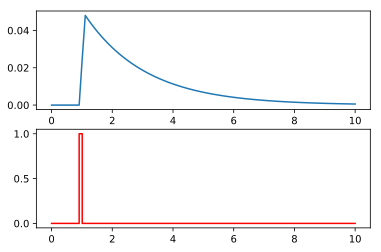

In [248]:
plt.subplot(2, 1, 1)
plt.plot(t,y_1)
plt.subplot(2, 1, 2)
plt.step(t,U_1, 'r')

### Second Impulse, $U_2(t)$

In [249]:
U_2 = np.zeros(len(T))
U_2[40] = 1
t, y_2, _ = control.forced_response(sys, T, U_2)

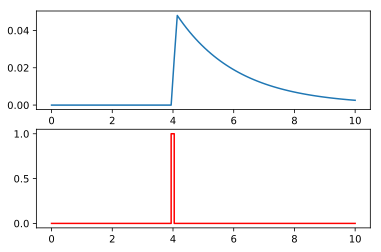

In [250]:
plt.subplot(2, 1, 1)
plt.plot(t,y_2)
plt.subplot(2, 1, 2)
plt.step(t,U_2, 'r')

### Additivity
Let's see what happens when we add up our $U$ and $y$ vectors.

In [251]:
U = U_1 + U_2
y = y_1 + y_2

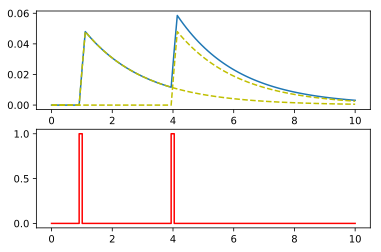

In [252]:
plt.subplot(2, 1, 1)
plt.plot(t,y)
plt.plot(t,y_1, 'y--')
plt.plot(t,y_2, 'y--')
plt.subplot(2, 1, 2)
plt.step(t,U, 'r')

Let's check to see if we get the same thing by calling `forced_response` with both inputs. 

In [253]:
U_check = np.zeros(len(T))
U_check[10] = 1
U_check[40] = 1
t, y_check, _ = control.forced_response(sys, T, U_check)

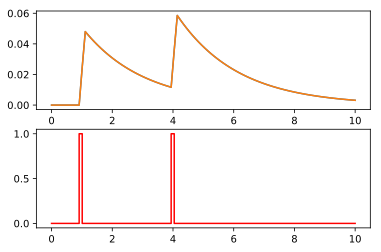

In [254]:
plt.subplot(2, 1, 1)
plt.plot(t,y_check)
plt.plot(t,y)
plt.subplot(2, 1, 2)
plt.step(t,U_check, 'r')

The lines overlap, looks good!

### Animation
Let's take another look at the additive property.

In [255]:
# Start by importing our animation libraries
%config InlineBackend.figure_formats = {'svg',}
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from IPython.display import display
from matplotlib import animation
from IPython.display import HTML

In [256]:
U_list = []
y_list = []

U_combined = np.zeros(len(T))

for i in range(1,3):
    U = np.zeros(len(T))
    U[i*(20)] = 1
    U_list.append(U)
    t, yout, _ = control.forced_response(sys, T, U)
    y_list.append(yout)
    U_combined += U
    
t, Y_combined, _ = control.forced_response(sys, T, U_combined)

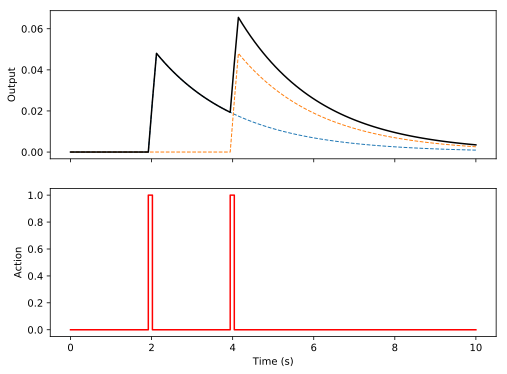

In [257]:
# Create sub plots
gs = gridspec.GridSpec(2,1)
f = plt.figure(figsize=(8,6));
ax1 = plt.subplot(gs[0, 0]); # row 0, col 0
ax2 = plt.subplot(gs[1, 0],sharex=ax1); # row 1, col 0
plt.setp(ax1.get_xticklabels(), visible=False)

output_lines = []

for i in range(len(U_list)):
    output_line, = ax1.plot(t, y_list[i], lw=1.0, linestyle='--');
    output_lines.append(output_line)

combined_output, = ax1.plot(t, Y_combined, lw=1.5, color='k');
combined_action, = ax2.step(t, U_combined, lw=1.5, linestyle='-', color='r');

ax1.set_ylabel('Output')
ax2.set_ylabel('Action')
ax2.set_xlabel('Time (s)')

# How many data points to skip for plotting
skip = 1

# The animation function. This is called sequentially, frame by frame, to create the animated plot.
def drawframe(n):
    for i in range(len(U_list)):
        output_lines[i].set_data(t[0:n*skip:skip], y_list[i][0:n*skip:skip])
    combined_output.set_data(t[0:n*skip:skip], Y_combined[0:n*skip:skip])
    combined_action.set_data(t[0:n*skip:skip], U_combined[0:n*skip:skip])
    
    # Print out the current frame using "\r", the 'carriage return' character, as our end character.
    # This makes Python print the frame on the same line.
    print("Frame: {:0d}".format(n), end="\r")
    return (line1,line2)

In [258]:
# The `interval` parameter is the delay between frames in milliseconds and it controls the speed of the animation. 
anim = animation.FuncAnimation(f, drawframe, frames=round(len(t)/skip), interval=50)
HTML(anim.to_jshtml())